## Training and testing mechine learning model for iris data set 
**Goal: Predict the species of an iris flower based on sepal and petal dimensions.**

In [50]:
# initial project imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model import
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import classification_report

# Data Import from sklearn.dataset()
from sklearn.datasets import load_iris

#### **Exploretory Data Analysis**

In [3]:
# iris data from sklearn.dataset()
iris = load_iris()

# Make the Numpy array data into pandas DataFrame
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['Species'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
# basi information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [5]:
# statical information about the data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# Look for Missing Values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [7]:
# Checking Duplicates
data = df.drop_duplicates(subset ="Species",)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
50,7.0,3.2,4.7,1.4,1.0
100,6.3,3.3,6.0,2.5,2.0


In [8]:
df.value_counts("Species")

Species
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

In [9]:
# Group the data by the target count
df.groupby("Species").count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Species,,,,
0.0,50,50,50,50
1.0,50,50,50,50
2.0,50,50,50,50


Scatter Plot for iris data 
- for sepal length VS. sepal width

CPU times: total: 0 ns
Wall time: 0 ns


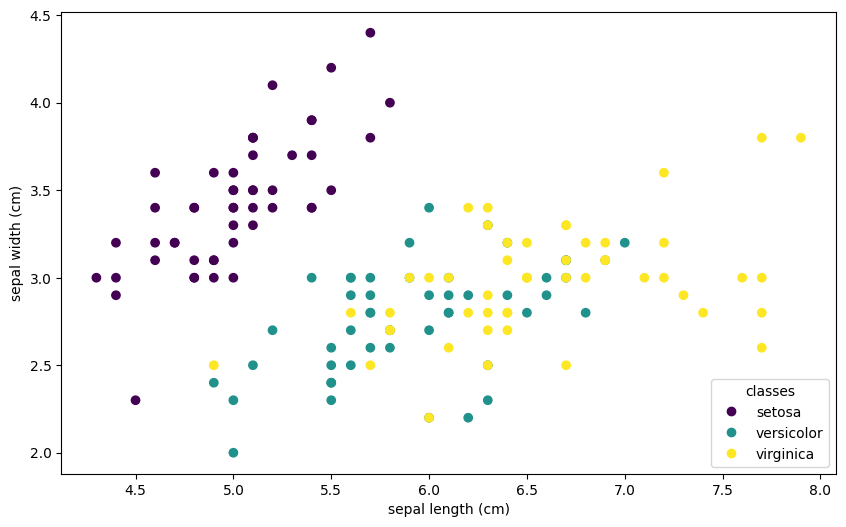

In [10]:
%time
fig, ax = plt.subplots(figsize = (10, 6))
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], 
        ylabel=iris.feature_names[1]);
ax.legend(scatter.legend_elements()[0], iris.target_names, title= "classes", loc="lower right");

In [11]:
iris_data_correlation = df.corr()

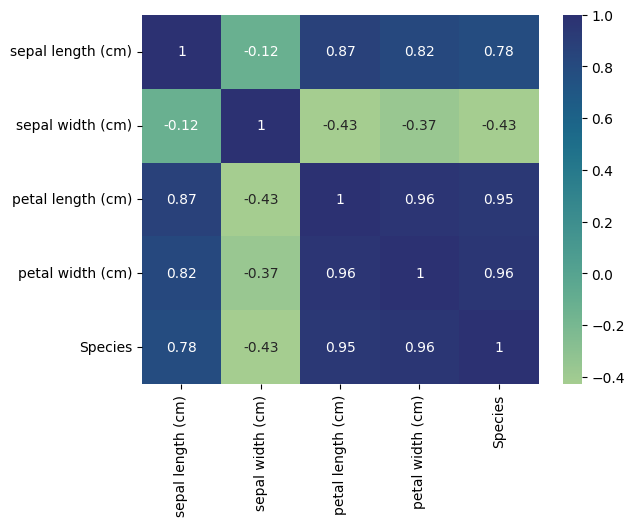

In [12]:
# Heatmap for iris dataset correlation 
sns.heatmap(iris_data_correlation, annot=True, cmap="crest");

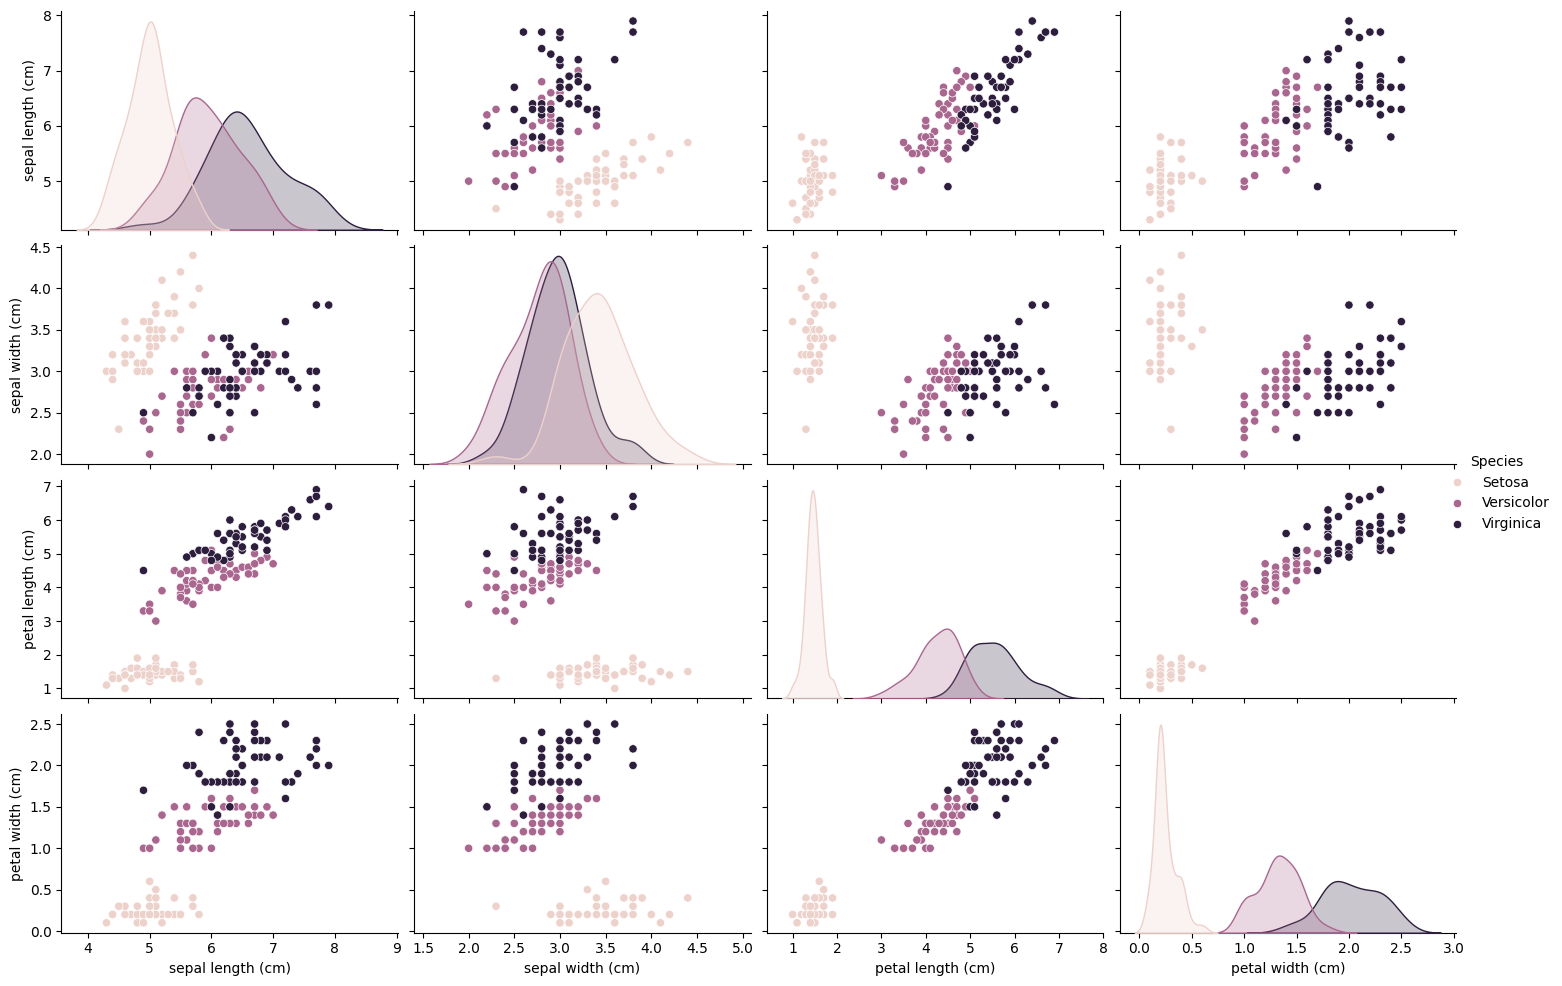

In [13]:
iris_plots = sns.pairplot(df, hue='Species', height=2.5, aspect=1.5)
# Change the individual legend labels
new_labels = ['Setosa', 'Versicolor', 'Virginica']
for t, l in zip(iris_plots._legend.texts, new_labels):
    t.set_text(l)
plt.show();

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


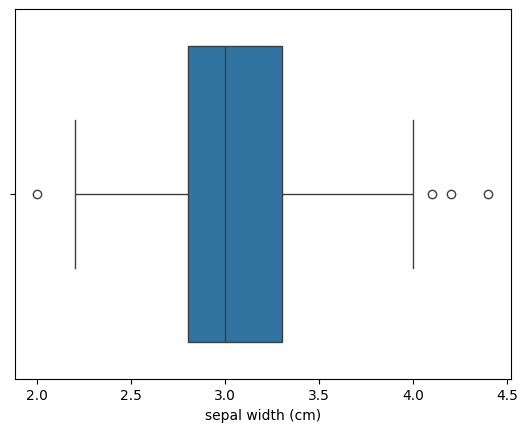

In [15]:
sns.boxplot(x ="sepal width (cm)", data=df);

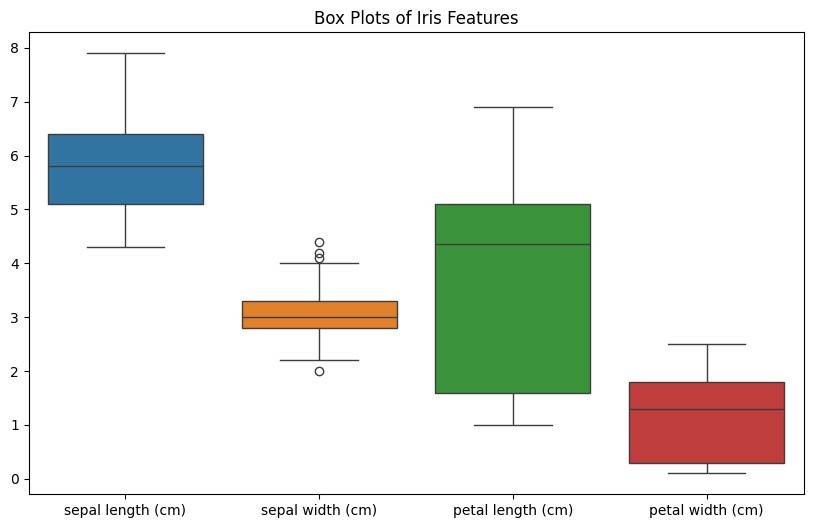

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop('Species', axis=1)) # Exclude 'Species'
plt.title('Box Plots of Iris Features')
plt.show()

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


#### *Handling Outliers*

Old Shape:  (150, 5)
New Shape:  (146, 5)


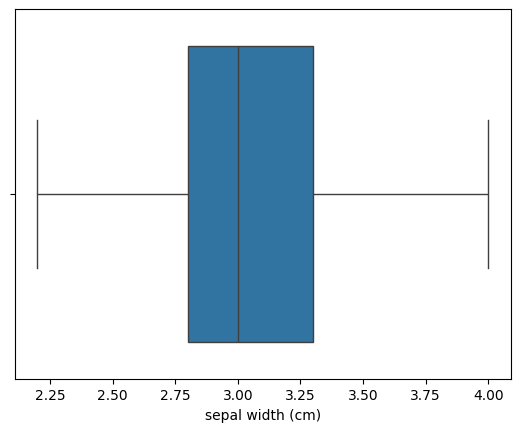

In [18]:
# IQR 
Q1 = np.percentile(df["sepal width (cm)"], 25, interpolation= 'midpoint')
Q3 = np.percentile(df["sepal width (cm)"], 75, interpolation= 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df.shape)

# upper bound 
upper = np.where(df["sepal width (cm)"] >= (Q3 + 1.5*IQR))

# Lower bound 
lower = np.where(df["sepal width (cm)"] <= (Q1 - 1.5*IQR))

# Removing the outliers
df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

print("New Shape: ", df.shape)
sns.boxplot(x='sepal width (cm)', data=df); 

### Modeling 

In [19]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


- There is No need for feature scaling in this dataset

*This is a classification dataset*
- we train with 3 mechine learning model to find the best model for the data 
1. Logisticregression 
2. KNeighborsClassifier
3. DecisionTreeClassifier

In [27]:
# Start with creating features and label
# split the data into train and test data to find accuracy score for each models
# Intanciate random seed
np.random.seed(42)

# create Features and labels for the dataset 
x = df.drop("Species", axis=1)
y = df["Species"]

# split into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2)

In [ ]:
# put models in a dectionary 
models = {"LogisticRegression": LogisticRegression(),
            "KNeighborsClassifier": KNeighborsClassifier(),
            "DecisionTreeClassifier": DecisionTreeClassifier()}

# create a function to fit the Mechine learning models 
def fit_and_model_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates the mechine learning models.
    models : a dictionary of different scikit-learn meachine learning models.
    x_train : training data (no labels)
    x_test : test data 
    y_train : training labels
    y_test : testing labels
    """
    
    # set Random seed
    np.random.seed(42)
    
    # Make a dictionarys to keep model scores 
    model_scores = {}
    
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(x_train, y_train)
        # evaluate the model and append it score to the model_scores
        model_scores[name] = model.score(x_test, y_test)
    
    return model_scores;


# create a function to fit mechine learning models for cross validation 
def cross_valid_score(models, x, y):
    """
    Fits and evaluates the mechine learning models.
    models : a dictionary of different scikit-learn meachine learning models.
    x : Features
    y : labels
    """
    
    # set random seed
    np.random.seed(42)
    
    # make a dectionary to keep model scores
    model_score = {}
    
    # loop through models
    for name, model in models.items():
        # evaluate the model and append the mean of cross validation score of each model
        model_score[name] = np.mean(cross_val_score(model, x, y))
    return model_score;

In [39]:
model_score = fit_and_model_score(  models = models,
                                    x_train = x_train,
                                    x_test = x_test,
                                    y_train = y_train,
                                    y_test = y_test)

model_score

{'LogisticRegression': 0.9333333333333333,
 'KNeighborsClassifier': 0.9666666666666667,
 'DecisionTreeClassifier': 0.9333333333333333}

In [46]:
# corss validation scores
cross_validation_score = cross_valid_score( models= models,
                                            x = x,
                                            y= y) 
cross_validation_score

{'LogisticRegression': np.float64(0.9726436781609195),
 'KNeighborsClassifier': np.float64(0.9726436781609195),
 'DecisionTreeClassifier': np.float64(0.9519540229885056)}

### Model Comperision

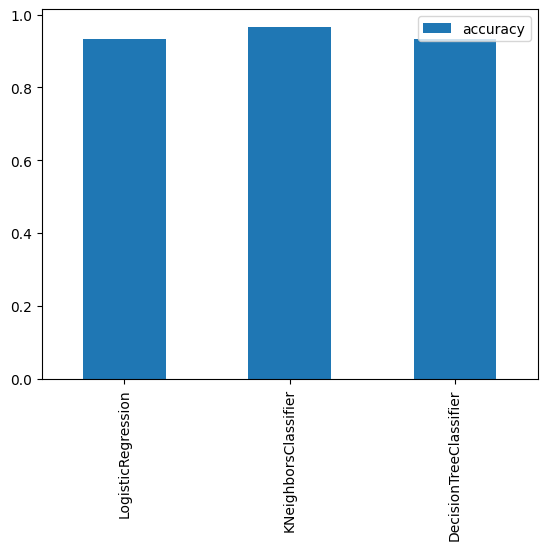

In [33]:
model_compere = pd.DataFrame(model_score, index=["accuracy"])
model_compere.T.plot.bar();

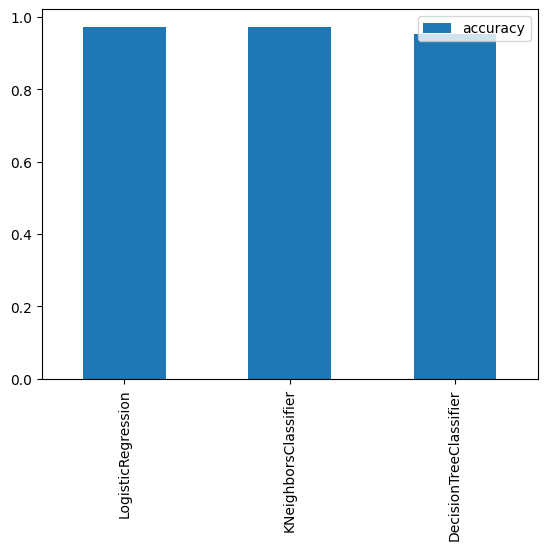

In [49]:
model_compere = pd.DataFrame(cross_validation_score, index=["accuracy"])
model_compere.T.plot.bar();

Make a Classification Report

In [56]:
log_rig = LogisticRegression()
log_rig.fit(x_train, y_train)
y_preds = log_rig.predict(x_test)
report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       0.88      0.88      0.88         8
         2.0       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [58]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_preds = KNN.predict(x_test)
report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      0.88      0.93         8
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



As per the evaluation with accuracy and cross validation KNeighborsClassifier has the higher score and the classification report also so i choose KNeighborsClassifier model for this isris dataset problem 

In [ ]:
# Final train the model to save
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
knn_model_score = KNN.score(x_test, y_test)

Model Saving methods

In [64]:
# 1. Pickle method
import pickle
with open("Models/knn_model.pkl", "wb") as f:
    pickle.dump(KNN, f)

In [66]:
# 2. joblib method
import joblib

joblib.dump(KNN, "Models/knn_model.joblib");

Load the saved Model for Testing

In [68]:
with open("Models/knn_model.pkl", "rb") as f:
    loaded_knn = pickle.load(f)

# Use the loaded model
loaded_knn.predict(x_test)

array([0., 2., 0., 0., 0., 2., 0., 1., 2., 0., 0., 2., 2., 1., 2., 0., 1.,
       2., 0., 1., 2., 2., 0., 1., 0., 1., 1., 2., 2., 0.])

In [70]:
loaded_knn = joblib.load("Models/knn_model.joblib")

# Use it
loaded_knn.predict(x_test)

array([0., 2., 0., 0., 0., 2., 0., 1., 2., 0., 0., 2., 2., 1., 2., 0., 1.,
       2., 0., 1., 2., 2., 0., 1., 0., 1., 1., 2., 2., 0.])

In [ ]:
score = loaded_knn.score(x_test, y_test)
print("Score:", score)

Score: 0.9666666666666667


In [82]:
# Predicting the Species 
sample_data = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=iris.feature_names) # Iris satosa

# use the loaded model 
prediction = loaded_knn.predict(sample_data)

# map prediction to species name
species = iris.target_names[int(prediction[0])]

print(f"The predicted iris flower is: {species}");

The predicted iris flower is: setosa
